<a href="https://colab.research.google.com/github/anushkashelke/languageDatasets/blob/main/MACHINE_LEARNING_Classify_Clothes_from_Fashion_MNIST_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classify Clothes from Fashion MNIST Dataset using Machine Learning Techniques**

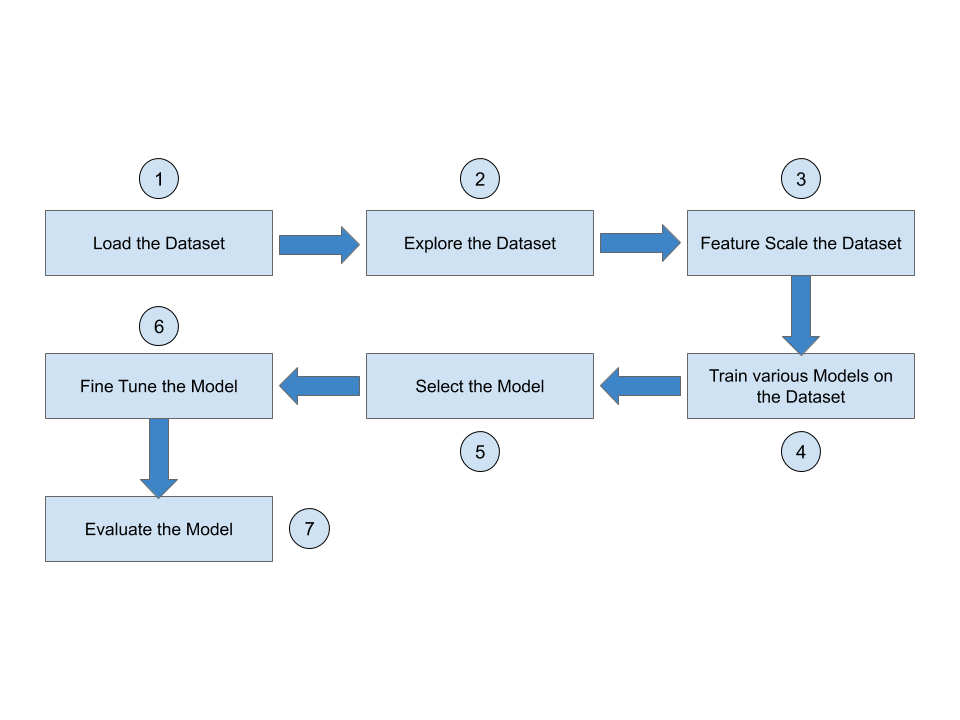

In [ ]:
import numpy as np
import pandas as pd
import gzip
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
def showImage(data):
    # Assign the flattened image data to a variable.
    some_article = data

    # Reshape the flat array into a 2D array of 28x28 pixels.
    # This is necessary to reconstruct the image as it was originally.
    some_article_image = some_article.reshape(28, 28)

    # Display the image:
    # - 'cmap=matplotlib.cm.binary' makes the image appear in black and white.
    # - 'interpolation="nearest"' ensures that the displayed image has sharp edges,
    #   which makes each pixel clearly visible as a square.
    plt.imshow(some_article_image, cmap=matplotlib.cm.binary, interpolation="nearest")

    # Hide the axes around the image so that only the image is displayed.
    plt.axis("off")

    # Show the image in a window.
    plt.show()


###Step 1: Load dataset from kaggle

In [ ]:
import numpy as np
import os

# File paths
filePath_train_set = '/content/train-images-idx3-ubyte'
filePath_train_label = '/content/train-labels-idx1-ubyte'
filePath_test_set = '/content/t10k-images-idx3-ubyte.gz'
filePath_test_label = '/content/t10k-labels-idx1-ubyte.gz'

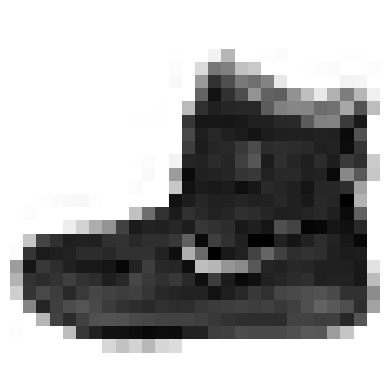

In [ ]:
def read_mnist(filename):
    import numpy as np

    with open(filename, 'rb') as f:
        # Read and ignore the magic number
        magic = int.from_bytes(f.read(4), 'big')
        # Read the number of items
        num_items = int.from_bytes(f.read(4), 'big')
        # Read dimensions based on the type of file (labels or images)
        if 'images' in filename:
            num_rows = int.from_bytes(f.read(4), 'big')
            num_cols = int.from_bytes(f.read(4), 'big')
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_items, num_rows * num_cols)
        else:  # labels
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_items)
        return data

# Update file paths if they are still zipped, they need to be unzipped or correctly referenced
filePath_train_set = '/content/train-images-idx3-ubyte'
filePath_train_label = '/content/train-labels-idx1-ubyte'
filePath_test_set = '/content/t10k-images-idx3-ubyte'  # If gzipped, it should be handled accordingly
filePath_test_label = '/content/t10k-labels-idx1-ubyte'  # Same as above

# Load the data using the updated function
trainSet = read_mnist(filePath_train_set)
trainLabel = read_mnist(filePath_train_label)
testSet = read_mnist(filePath_test_set)
testLabel = read_mnist(filePath_test_label)

# Define and show an image
def showImage(data):
    import matplotlib.pyplot as plt
    import matplotlib
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

# Show an image from the training set
showImage(trainSet[0])


In [ ]:
X_train = trainSet
y_train = trainLabel
X_test = testSet
y_test = testLabel

In [ ]:
X_train.shape #Number of instances in training data

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
#How many features are there in Fashion-MNIST Training dataset ? 784

###Step 2: Explore the data

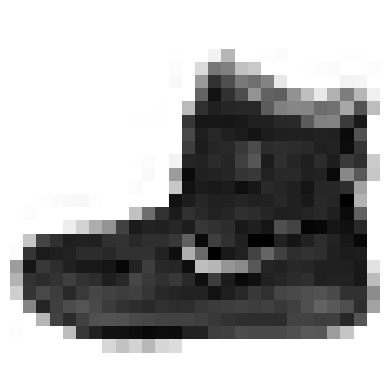

In [ ]:
  showImage(X_train[0])

In [ ]:
  y_train[0]

9

###Step 3: Feature Scale the Dataset

**Data Preparation**

As part of data preparation, we need to perform following techniques on the data:



1.   Shuffling
2.   Feature Scaling


**Shuffling the training dataset** - to get uniform samples for cross validation

We need to shuffle our training data to ensure that we don't miss out any article (fashion product) in a cross validation fold.

**Feature Scaling**

Each image (instance) in the dataset has 784 pixels (features) and value of each feature(pixel) ranges from 0 to 255, and this range is too wide , hence we would need to use feature scaling here to apply standardization to this dataset X_train, so that all the values of each feature (pixel) is in a small range (based on the standard deviation value).

In [ ]:
np.random.seed(42)

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

#x_scaled = (x - x_mean) / standard deviation



#this code is preparing the training data by shuffling and scaling it, which are common preprocessing steps to optimize the performance of many machine learning algorithms, especially those sensitive to the scale of input data such as SVMs, k-nearest neighbors, and neural networks.

###Step 4: Train various Models on the Dataset

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score


**Training the Model - Softmax Regression**


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


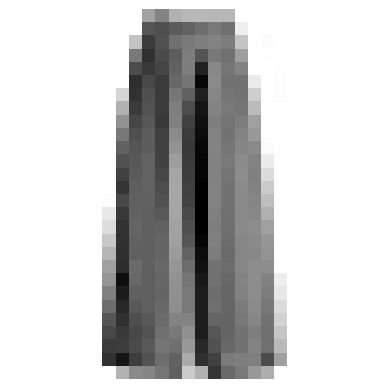

Logistic Accuracy:  0.8775333333333334
Logistic Precision:  0.876648632278309
Logistic Recall:  0.8775333333333334
Logistic F1 Score:  0.8769281105807729


In [ ]:
from sklearn.linear_model import LogisticRegression

# using Softmax Regression (multi-class classification problem)
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
# 'C' is hyperparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm

log_clf.fit(X_train_scaled, y_train)

# Let us predict some instance from the dataset using the above trained model
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))

y_train[0]

#Let us see the predicted class

y_train_predict[0]

showImage(X_train[0])

# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = log_clf.predict(X_train_scaled)

log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_recall)
print("Logistic F1 Score: ", log_f1_score)

**Training the Model - Random Forest Classifier**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
#fit and evaluate
rf_clf.fit(X_train, y_train)  # Note: No need to use scaled data for RandomForest


RandomForestClassifier(random_state=42)

In [ ]:
# Predict using the trained model
y_train_pred_rf = rf_clf.predict(X_train)

# Calculate metrics
rf_accuracy = accuracy_score(y_train, y_train_pred_rf)
rf_precision = precision_score(y_train, y_train_pred_rf, average='weighted')
rf_recall = recall_score(y_train, y_train_pred_rf, average='weighted')
rf_f1_score = f1_score(y_train, y_train_pred_rf, average='weighted')

print("RandomForest Accuracy: ", rf_accuracy)
print("RandomForest Precision: ", rf_precision)
print("RandomForest Recall: ", rf_recall)
print("RandomForest F1 Score: ", rf_f1_score)


RandomForest Accuracy:  1.0
RandomForest Precision:  1.0
RandomForest Recall:  1.0
RandomForest F1 Score:  1.0


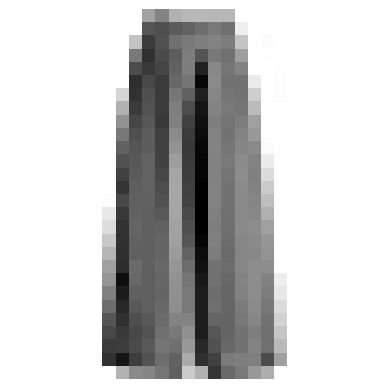

In [ ]:
showImage(X_train[0])

###Step 5: Select the Model

Cross Validation- Softmax Regression

In [ ]:
# Importing necessary libraries for model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Function to display the scores from cross-validation
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Create an instance of LogisticRegression with specified parameters
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

# Perform cross-validation and compute accuracy scores
log_cv_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
display_scores(log_cv_scores)  # Display the results

# Store the mean accuracy score
log_cv_accuracy = log_cv_scores.mean()

# Using cross_val_predict to make predictions
y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv=3)

# Compute the confusion matrix
log_confusion_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", log_confusion_matrix)

# Compute precision, recall, and F1 score
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
log_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

# Print all calculated metrics
print("Cross-Validation Accuracy:", log_cv_accuracy)
print("Cross-Validation Precision:", log_cv_precision)
print("Cross-Validation Recall:", log_cv_recall)
print("Cross-Validation F1 Score:", log_cv_f1_score)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Scores: [0.8497 0.8482 0.8512]
Mean: 0.8497
Standard deviation: 0.00122474487139159


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Confusion Matrix:
 [[4905   22  119  260   25   11  568    7   78    5]
 [  22 5797   24  117   12    1   20    3    3    1]
 [ 103   10 4475   66  725    9  572    5   34    1]
 [ 233   80   82 5206  196    2  164    5   30    2]
 [  26   13  544  193 4672    4  517    1   30    0]
 [   5    5    2    3    1 5558    2  267   47  110]
 [ 877   20  679  210  569    0 3535    4  103    3]
 [   0    0    1    1    0  209    0 5579   16  194]
 [  46    7   44   39   38   55  110   33 5607   21]
 [   1    5    1    1    0  101    0  236    7 5648]]
Cross-Validation Accuracy: 0.8497
Cross-Validation Precision: 0.8486205911641644
Cross-Validation Recall: 0.8497
Cross-Validation F1 Score: 0.848961020597376


Cross Validation- RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Function to display the scores from cross-validation
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Create an instance of RandomForestClassifier with specified parameters
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

# Perform cross-validation and compute accuracy scores
rnd_cv_scores = cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring="accuracy")
display_scores(rnd_cv_scores)  # Display the results

# Store the mean accuracy score
rnd_cv_accuracy = rnd_cv_scores.mean()

# Using cross_val_predict to make predictions
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)

# Compute the confusion matrix
rnd_confusion_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", rnd_confusion_matrix)

# Compute precision, recall, and F1 score
rnd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
rnd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
rnd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

# Print all calculated metrics
print("RandomForest Cross-Validation Accuracy:", rnd_cv_accuracy)
print("RandomForest Cross-Validation Precision:", rnd_cv_precision)
print("RandomForest Cross-Validation Recall:", rnd_cv_recall)
print("RandomForest Cross-Validation F1 Score:", rnd_cv_f1_score)


Scores: [0.849   0.8464  0.85105]
Mean: 0.8488166666666667
Standard deviation: 0.0019027757502016486
Confusion Matrix:
 [[5040    4   93  351   34    4  417    0   57    0]
 [  19 5715   36  198   12    0   18    0    2    0]
 [  42    2 4450   50 1102    2  308    0   44    0]
 [ 144   20   61 5416  217    0  133    0    8    1]
 [  12    7  488  322 4848    1  300    0   21    1]
 [   0    0    1    2    0 5531    2  328   35  101]
 [1151    3  835  203  684    2 3024    0   97    1]
 [   0    0    0    0    0  116    0 5505   11  368]
 [  17    3   50   16   32   22   53   17 5782    8]
 [   0    0    1    3    0   62    3  304    9 5618]]
RandomForest Cross-Validation Accuracy: 0.8488166666666667
RandomForest Cross-Validation Precision: 0.8485415910880068
RandomForest Cross-Validation Recall: 0.8488166666666667
RandomForest Cross-Validation F1 Score: 0.8461592966817439


In [ ]:
print("=== Softmax === ")
display_scores(log_cv_scores)
print("log_cv_accuracy:", log_cv_accuracy)
print("log_cv_precision:", log_cv_precision)
print("log_cv_recall:", log_cv_recall)
print("log_cv_f1_score:", log_cv_f1_score)

print("\n\n=== Random Forest === ")
display_scores(rnd_cv_scores)
print("rnd_cv_accuracy:", rnd_cv_accuracy)
print("rnd_cv_precision:", rnd_cv_precision)
print("rnd_cv_recall :", rnd_cv_recall )
print("rnd_cv_f1_score:", rnd_cv_f1_score)

=== Softmax === 
Scores: [0.8497 0.8482 0.8512]
Mean: 0.8497
Standard deviation: 0.00122474487139159
log_cv_accuracy: 0.8497
log_cv_precision: 0.8486205911641644
log_cv_recall: 0.8497
log_cv_f1_score: 0.848961020597376


=== Random Forest === 
Scores: [0.849   0.8464  0.85105]
Mean: 0.8488166666666667
Standard deviation: 0.0019027757502016486
rnd_cv_accuracy: 0.8488166666666667
rnd_cv_precision: 0.8485415910880068
rnd_cv_recall : 0.8488166666666667
rnd_cv_f1_score: 0.8461592966817439


###Step 6: Fine Tune the Model


####**Grid Search - Dimensionality Reduction**
We will perform using 'Grid Search' technique.

Grid search takes a lot of time on large datasets. Hence, let us apply 'Dimensionality Reduction' to the training dataset to reduce the number of features in the dataset, so that the time taken for grid search and prediction is reduced. Also, we will calculate the scores based on the reduced features.

We will also check, if dimensionality reduction leads to any significant loss of information from the images in our training dataset. If we get a significant loss of information with dimensionality reduction, we will not use dimensionality reduction for our training dataset (and hence the problem).

Our dataset is not like a Swiss-roll, therefore, we don't need to convert a 3-dimensional dataset to 2-dimensional plane, etc. Hence, we won't be using Manifold technique for dimensionality reduction here.

We will be using Projection technique (PCA) for dimensionality reduction for our problem.

We will use Scikit Learn's PCA class which uses SVD (Singular Value Decomposition) internally and also the projection.

You can experiment with various values of n_components (variance ratio).

For the current problem, with n_components=0.95, in the reduced dataset (X_train_reduced) we got only 187 features (out of original 784), and there was significant loss of information (quality) in the 'recovered' (decompressed) images. Hence, we have selected n_components=0.99, which gives 459 features (out of original 784) and there is no significant loss of information (quality) in the 'recovered' images.

The comparison of the 'original' dataset images and the 'compressed' dataset images (got after decompression) shows that there is not much information loss due to dimensionality reduction by using 0.99 variance ratio. Hence, we will go ahead with performing the Grid Search using this 'reduced' training dataset (X_train_reduced).

Number of PCA components: 459
Explained variance ratio (total): 0.9900347820630975


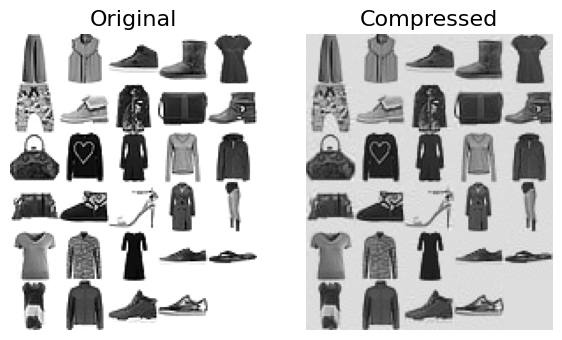

In [ ]:
# Importing PCA from sklearn
from sklearn.decomposition import PCA
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Create an instance of PCA with n_components set to retain 99% of the variance
pca = PCA(n_components=0.99)

# Apply PCA to the training dataset X_train and save the result in X_train_reduced
X_train_reduced = pca.fit_transform(X_train)

# Check the number of components (features) present in the X_train_reduced dataset
print("Number of PCA components:", pca.n_components_)

# Check if you have hit a total of 99% explained variance ratio with the selected number of components
print("Explained variance ratio (total):", np.sum(pca.explained_variance_ratio_))

# Recover (decompress) some of the images (instances) of the X_train_reduced dataset
X_train_recovered = pca.inverse_transform(X_train_reduced)

# Define a function to plot digits (as provided)
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=matplotlib.cm.binary, **options)
    plt.axis("off")

# Plotting the original and the recovered images
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])  # Adjust indexing if necessary for your dataset
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_train_recovered[::2100])  # Adjust indexing if necessary for your dataset
plt.title("Compressed", fontsize=16)
plt.show()


####**Tuning Hyperparameters**


In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameters for logistic regression
param_grid = [
    {
        "lr__multi_class": ["multinomial"],
        "lr__solver": ["lbfgs"],
        "lr__C": [5],
        "rf__n_estimators": [20],
        "rf__max_depth": [10, 15],
    }
]

# Create an instance of LogisticRegression
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

# Create an instance of RandomForestClassifier
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

# Create an instance of VotingClassifier
voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

# Setup GridSearchCV to find the best parameters for the ensemble
grid_search = GridSearchCV(voting_clf_grid_search, param_grid, cv=3, scoring='neg_mean_squared_error')

# Run grid search on the reduced training dataset
grid_search.fit(X_train_reduced, y_train)

# Get the best hyperparameter values
print("Best hyperparameters:", grid_search.best_params_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Look at the score of each hyperparameter combination used during the grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters: {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}
1.3808873958437018 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
1.370978968960988 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}


Best hyperparameters: {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}
1.3808873958437018 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
1.370978968960988 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}

###Step 7: Evaluate the Model

Final Accuracy: 0.8495
Final Precision: 0.8473278209853911
Final Recall: 0.8495
Final F1 Score: 0.8479205933541918
Actual label: 9
Predicted label: 9


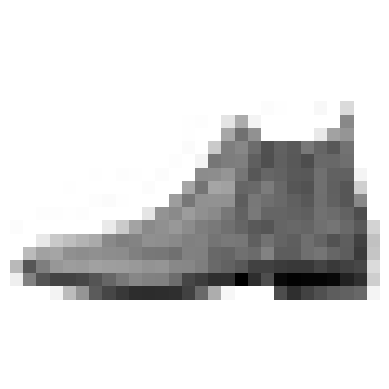

In [ ]:
# Storing the best_estimator_ model from grid search in a variable
final_model = grid_search.best_estimator_

# Importing necessary functions from sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Using the existing PCA instance (pca) to transform the test dataset
X_test_reduced = pca.transform(X_test)

# Performing predictions on the reduced test dataset using the final model
y_test_predict = final_model.predict(X_test_reduced)

# Creating the confusion matrix
final_confusion_matrix = confusion_matrix(y_test, y_test_predict)

# Calculating various metrics scores using the actual and the predicted values
final_accuracy = accuracy_score(y_test, y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')

# Printing the values of the calculated metrics
print("Final Accuracy:", final_accuracy)
print("Final Precision:", final_precision)
print("Final Recall:", final_recall)
print("Final F1 Score:", final_f1_score)

# Just check with a sample value, if the predictions were correct
print("Actual label:", y_test[0])
print("Predicted label:", y_test_predict[0])

# If you have a function showImage defined previously, use it to show the image
# Assuming `showImage` function is available and `X_test` data hasn't been transformed to PCA for visualization
import matplotlib.pyplot as plt
def showImage(data):
    image = data.reshape(28, 28)  # Reshape data to 28x28 matrix
    plt.imshow(image, cmap=plt.cm.binary, interpolation='nearest')
    plt.axis("off")
    plt.show()

showImage(X_test[0])


Best hyperparameters: {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}
Confusion Matrix:
 [[829   3  15  46   3   2  88   1  13   0]
 [  3 960   5  23   5   0   4   0   0   0]
 [ 26   3 744  14 117   3  81   2  10   0]
 [ 29  12  16 871  28   2  35   0   7   0]
 [  0   1 103  36 775   2  75   1   7   0]
 [  0   0   0   1   0 928   0  47   4  20]
 [157   3 119  36  98   2 559   0  26   0]
 [  0   0   0   0   0  30   0 932   0  38]
 [  6   1   4  10   4   4  14   6 948   3]
 [  0   0   0   0   0  13   0  36   2 949]]
Final Accuracy: 0.8495
Final Precision: 0.8473278209853911
Final Recall: 0.8495
Final F1 Score: 0.8479205933541918
Actual label: 9
Predicted label: 9


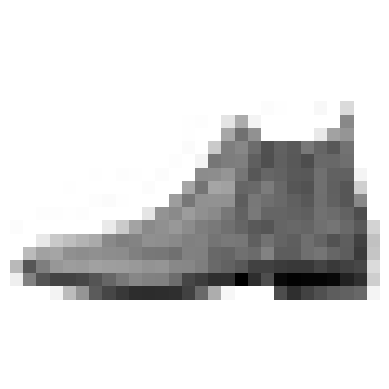

In [ ]:
# Storing the best_estimator_ model from grid search in a variable
final_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Importing necessary functions from sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Using the existing PCA instance (pca) to transform the test dataset
X_test_reduced = pca.transform(X_test)

# Performing predictions on the reduced test dataset using the final model
y_test_predict = final_model.predict(X_test_reduced)

# Creating the confusion matrix
final_confusion_matrix = confusion_matrix(y_test, y_test_predict)
print("Confusion Matrix:\n", final_confusion_matrix)

# Calculating various metrics scores using the actual and the predicted values
final_accuracy = accuracy_score(y_test, y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')

# Printing the values of the calculated metrics
print("Final Accuracy:", final_accuracy)
print("Final Precision:", final_precision)
print("Final Recall:", final_recall)
print("Final F1 Score:", final_f1_score)

# Just check with a sample value, if the predictions were correct
print("Actual label:", y_test[0])
print("Predicted label:", y_test_predict[0])

# If you have a function showImage defined previously, use it to show the image
# Assuming `showImage` function is available and `X_test` data hasn't been transformed to PCA for visualization
import matplotlib.pyplot as plt
def showImage(data):
    image = data.reshape(28, 28)  # Reshape data to 28x28 matrix
    plt.imshow(image, cmap=plt.cm.binary, interpolation='nearest')
    plt.axis("off")
    plt.show()

showImage(X_test[0])


In [ ]:
X_test_reduced.shape

(10000, 459)